In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


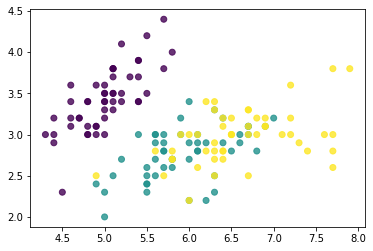

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

# 1. Train_test_split

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

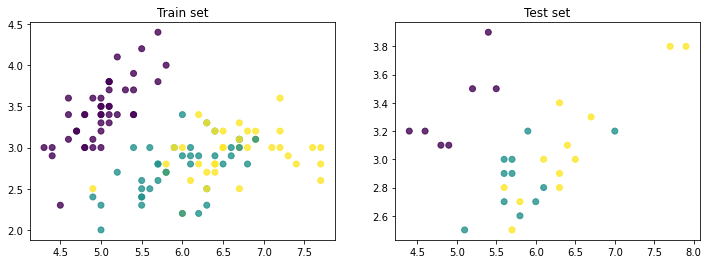

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha =0.8)
plt.title('Test set')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print('Train_score:', model.score(X_train, y_train))
print('Train_score:', model.score(X_test, y_test))

Train_score: 0.9833333333333333
Train_score: 0.9333333333333333


# 2.Cross validation

In [14]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9583333333333333

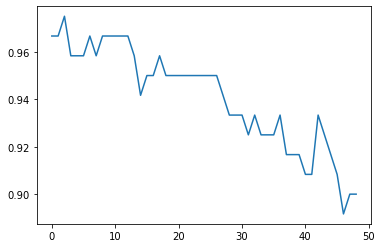

In [18]:
val_score = []
for k in range (1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
    
plt.plot(val_score)

# 3. Validation curve

In [19]:
from sklearn.model_selection import validation_curve

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


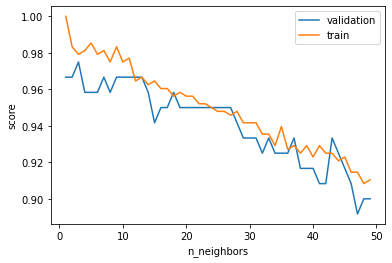

In [24]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# 4.GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'n_neighbors': np.arange(1, 20),
             'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [27]:
grid.best_score_

0.975

In [28]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [29]:
model = grid.best_estimator_

In [30]:
model.score(X_test, y_test)

0.9333333333333333

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int64)

# 5. Learning curve

In [33]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


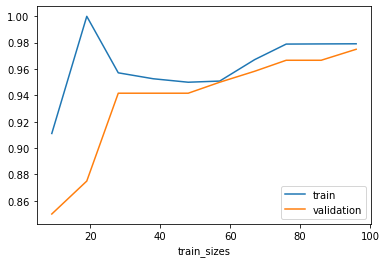

In [35]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()